In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from datetime import datetime
import joblib
import pickle

In [2]:
# 📘 Basic-Level (1–10)
# 1. Create a pivot table showing total sales per category.
# 2. Create a pivot table to find average profit by region.
# 3. Show sum of quantity by ship mode using a pivot table.
# 4. Display total sales by category and sub-category.
# 5. Find the average discount for each segment.
# 6. Create a pivot table that shows total profit by year (extract year from “Order Date”).
# 7. Display count of orders by region and segment.
# 8. Find maximum sales per category.
# 9. Find minimum profit per region.
# 10. Create a pivot table to get total sales and profit by category.

In [3]:
df=pd.read_excel(r'E:\Data Analytics\Pyhton\Python Datas\Superstore.xlsx')
df

C:\Users\KUMAR COMPUTERS\anaconda3\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2016-110422,2016-01-21,2016-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [5]:
# 1. Create a pivot table showing total sales per category.
pd.pivot_table(df,index='Category',values='Sales',aggfunc='sum').reset_index().round(2)

,Category,Sales
0,Furniture,741999.80
1,Office Supplies,719047.03
2,Technology,836154.03


In [7]:
# 2. Create a pivot table to find average profit by region.
year=df[df['Order Date'].dt.year==2018]
pd.pivot_table(year,index='Region',values='Profit',aggfunc='mean').reset_index().round(2)

,Region,Profit
0,Central,33.00
1,East,26.29
2,South,42.86
3,West,29.88


In [21]:
# 3. Show sum of quantity by ship mode using a pivot table.
pd.pivot_table(df,index='Ship Mode',values='Quantity',aggfunc='sum').reset_index().sort_values('Quantity',ascending=False)

,Ship Mode,Quantity
3,Standard Class,22797
2,Second Class,7423
0,First Class,5693
1,Same Day,1960


In [27]:
# 4. Display total sales by category and sub-category.
ds=pd.pivot_table(df,index=['Category','Sub-Category'],values='Sales',aggfunc='sum').reset_index().round(2)
ds

,Category,Sub-Category,Sales
0,Furniture,Bookcases,114880.00
1,Furniture,Chairs,328449.10
2,Furniture,Furnishings,91705.16
3,Furniture,Tables,206965.53
4,Office Supplies,Appliances,107532.16
5,Office Supplies,Art,27118.79
6,Office Supplies,Binders,203412.73
7,Office Supplies,Envelopes,16476.40
8,Office Supplies,Fasteners,3024.28
9,Office Supplies,Labels,12486.31


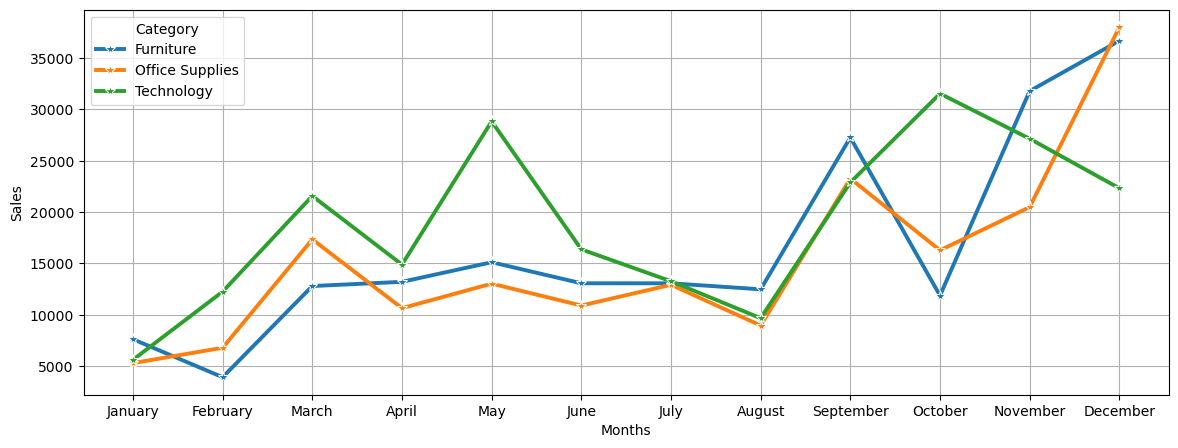

In [36]:
# 4. Display total sales by category.
df['Months'] = df['Order Date'].dt.month_name()
df['Month no'] = df['Order Date'].dt.month
year=df[df['Order Date'].dt.year==2018]
month=year.groupby(['Category','Month no','Months'])['Sales'].sum().reset_index()
plt.figure(figsize=(14,5))
sn.lineplot(data=month,x='Months',y='Sales',hue='Category',linewidth=2.8,marker='*',markersize=8)
plt.grid()
plt.show()

In [41]:
# 5. Find the average discount for each segment.
pd.pivot_table(df,index='Segment',values='Discount',aggfunc='mean').reset_index()

,Segment,Discount
0,Consumer,0.158141
1,Corporate,0.158228
2,Home Office,0.147128


In [43]:
# 5. Find the average discount for each segment.
avg=df.groupby(['Segment'])['Discount'].mean()*100
avg.reset_index()

,Segment,Discount
0,Consumer,15.814101
1,Corporate,15.822848
2,Home Office,14.712844


In [52]:
# 6. Create a pivot table that shows total profit by year (extract year from “Order Date”).
df['Year'] = df['Order Date'].dt.year
df.groupby(['Year'])['Profit'].sum().reset_index().round(2)



,Year,Profit
0,2016,49543.97
1,2017,61618.60
2,2018,81795.17
3,2019,93439.27


In [51]:
df.groupby([df['Order Date'].dt.year])['Profit'].sum().reset_index().round(2)

,Order Date,Profit
0,2016,49543.97
1,2017,61618.60
2,2018,81795.17
3,2019,93439.27


In [53]:
# 7. Display count of orders by region and segment.
df.groupby(['Region','Segment'])['Order ID'].count().reset_index()

,Region,Segment,Order ID
0,Central,Consumer,1212
1,Central,Corporate,673
2,Central,Home Office,438
3,East,Consumer,1469
4,East,Corporate,877
5,East,Home Office,502
6,South,Consumer,838
7,South,Corporate,510
8,South,Home Office,272
9,West,Consumer,1672


In [60]:
# 8. Find maximum sales per category.
ds=df.groupby(['Category'])['Sales'].max().reset_index().round(2)
ds

,Category,Sales
0,Furniture,4416.17
1,Office Supplies,9892.74
2,Technology,22638.48


In [67]:
# for check 
fr=df[df['Category']=='Office Supplies']
fr['Sales'].max()

9892.74

In [69]:
# 9. Find minimum profit per region.
df.groupby(['Region'])['Profit'].min().reset_index().round(2)

,Region,Profit
0,Central,-3701.89
1,East,-6599.98
2,South,-3839.99
3,West,-3399.98


In [72]:
# 10. Create a pivot table to get total sales and profit by category.
pd.pivot_table(df,index='Category',values=['Sales','Profit'],aggfunc='sum').reset_index().round(2)

,Category,Profit,Sales
0,Furniture,18451.27,741999.80
1,Office Supplies,122490.80,719047.03
2,Technology,145454.95,836154.03


In [80]:
# ⚙ Intermediate-Level (11–20)
# 11. Create a pivot table showing sales by category and region, fill missing values with 0.
pd.pivot_table(df,index='Category',columns='Region',values='Sales',aggfunc='sum',fill_value=0).reset_index().round(2)

Region,Category,Central,East,South,West
0,Furniture,163797.16,208291.20,117298.68,252612.74
1,Office Supplies,167026.42,205516.06,125651.31,220853.25
2,Technology,170416.31,264973.98,148771.91,251991.83


In [93]:
# 12. Find the average profit margin (Profit/Sales) by category.
df['Profit Margin'] = df['Profit']/df['Sales']
pr=df.groupby(['Category'])['Profit Margin'].mean()*100
pr.reset_index().round(2)

,Category,Profit Margin
0,Furniture,3.88
1,Office Supplies,13.80
2,Technology,15.61


In [75]:
# 13. Create a pivot table with multiple aggregation functions — show both sum and mean of sales by region.


In [76]:
# 14. Display total sales by segment and year, sorted by descending sales.

In [ ]:
# 15. Find which region had the highest total sales using pivot table results.